# Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [56]:
#Importing all necessary Libraries for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

In [58]:
#Reading the Dataset from the CSV File 
autolib_df = pd.read_csv('Autolib_data.csv')

In [59]:
autolib_df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [122]:
autolib_df.shape

(5000, 19)

# Data Cleaning and Preparation

In [60]:
#Checking the unique data in month and year column to decide whether to drop them
autolib_df.month.unique()
autolib_df.year.unique()

array([2018])

Validity. Some columns may not be neccessary to conduct this research. Others are redundant. Eg.Cars column and Bluecar counter column have the same data. Dropping Cars column to remain with Bluecar counter column. Geo Point Column does not help in this research. Scheduled at column is only valid for Future stations. Since the research is specifically for Stations already in existence, I will also drop that column and any data associated with future Stations. The Year and Month column also dont change hence they will be dropped

In [61]:
#Dropping Unneccesary Columns
autolib_df = autolib_df.drop(['Cars', 'Geo point','Scheduled at','year','month'], axis = 1) 

In [62]:
autolib_df.head(3)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


Drop any data associated with future Stations since we will not be using that data in this research

In [63]:
autolib_df['Subscription status'].unique()

array(['nonexistent', 'operational', 'broken'], dtype=object)

No data on Future Stations

Completeness. Checking for missing values

In [64]:
autolib_df.isnull().sum()

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Postal code               0
Public name               0
Rental status             0
Slots                     0
Station type              0
Status                    0
Subscription status       0
day                       0
hour                      0
minute                    0
dtype: int64

The data is generally complete. Displayed comment has alot of missing values. It is of no use to this research too. It has to be dropped

In [65]:
autolib_df = autolib_df.drop('Displayed comment', axis = 1) 


In [66]:
autolib_df.head(2)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24


Consistency - Checking for and removing Duplicates

In [67]:
autolib_df[autolib_df.duplicated()] 

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute


The data has no duplicates.

Consistency. Making sure that the data type on each attribute is as it should be

In [68]:
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Bluecar counter      5000 non-null   int64 
 2   Utilib counter       5000 non-null   int64 
 3   Utilib 1.4 counter   5000 non-null   int64 
 4   Charge Slots         5000 non-null   int64 
 5   Charging Status      5000 non-null   object
 6   City                 5000 non-null   object
 7   ID                   5000 non-null   object
 8   Kind                 5000 non-null   object
 9   Postal code          5000 non-null   int64 
 10  Public name          5000 non-null   object
 11  Rental status        5000 non-null   object
 12  Slots                5000 non-null   int64 
 13  Station type         5000 non-null   object
 14  Status               5000 non-null   object
 15  Subscription status  5000 non-null   object
 16  day   

Attribute data types seem to be okay. Checking for outliers :

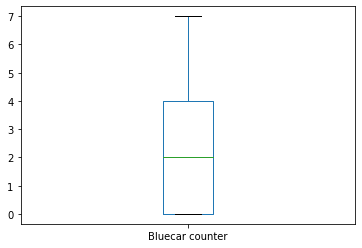

In [69]:
autolib_df.boxplot(column =['Bluecar counter'], grid = False) 


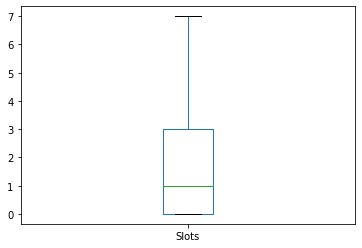

In [70]:
autolib_df.boxplot(column =['Slots'], grid = False) 


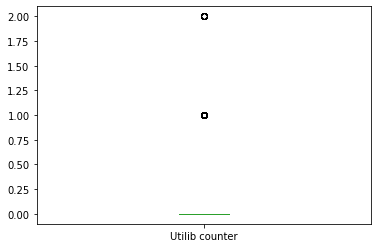

In [71]:
autolib_df.boxplot(column =['Utilib counter'], grid = False) 

Most of the necessary columns for this analysis do not have outliers. The data seems ready to be analysed.

# Data Exploration and Analysis

In [72]:
autolib_df.describe()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,4.941600,11.509200,29.270000
std,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,3.000000,6.000000,14.000000
50%,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,5.000000,11.000000,29.000000
75%,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,7.000000,18.000000,44.000000
max,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,9.000000,23.000000,59.000000


In [74]:
autolib_df.head(2)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24


Research Question : Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

Process : 
Create a new column specifiying if a certain row represents a picked car, returned car or no changes.
To do this : 
Group By Station then for each station group sort by time ie..day then hour then minute
Create a column to check for difference between  successive blue counter rows. Depending on the value we then decide whether it was a picked car, returned car or no changes. 

Trying to see if this will work in one station first. Lets pick 145 Rue Raymond Losserand as the address to test the above Idea

In [127]:
#Creating a new dataframe from 145 Rue Raymond Losserand station
raymond_df = autolib_df[autolib_df['Address']=='145 Rue Raymond Losserand'].sort_values(by=['day'])

In [76]:
raymond_df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
919,145 Rue Raymond Losserand,3,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,3,18,5
55,145 Rue Raymond Losserand,4,0,0,1,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,4,10,9
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
1877,145 Rue Raymond Losserand,2,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,7,14,57


In [129]:
#Getting the difference between consecutive Bluecounter Rows and saving it in a new column 'diff'
raymond_df['diff'] =  raymond_df['Bluecar counter'].diff()
raymond_df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,diff
919,145 Rue Raymond Losserand,3,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,3,18,5,NaN
55,145 Rue Raymond Losserand,4,0,0,1,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,4,10,9,1.0
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24,2.0
1877,145 Rue Raymond Losserand,2,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,7,14,57,-4.0


In [130]:
#Fill all Null values with 0
raymond_df['diff'].fillna(0, inplace=True)

In [79]:
raymond_df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,diff
919,145 Rue Raymond Losserand,3,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,3,18,5,0.0
55,145 Rue Raymond Losserand,4,0,0,1,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,4,10,9,1.0
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24,2.0
1877,145 Rue Raymond Losserand,2,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,7,14,57,-4.0


In [131]:
#Depending on the value on the ‘Diff’ column we then decide whether it was a picked car, returned car or no action
conditions = [
    (raymond_df['diff'] < 0),
    (raymond_df['diff'] > 0),
    (raymond_df['diff'] == 0)
    ]
values = ['Picked','Returned','No action']
raymond_df['Action'] = np.select(conditions, values)

In [132]:
raymond_df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,diff,Action
919,145 Rue Raymond Losserand,3,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,3,18,5,0.0,No action
55,145 Rue Raymond Losserand,4,0,0,1,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,4,10,9,1.0,Returned
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24,2.0,Returned
1877,145 Rue Raymond Losserand,2,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,2,station,ok,nonexistent,7,14,57,-4.0,Picked


Seems like the Idea works just fine. Attempting to implement it on the entire DataFrame

In [133]:
#Sort the entire dataframe by address and day
autolib_df_sorted = autolib_df.sort_values(by=['Address','day'])
autolib_df_sorted

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
299,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,5,station,ok,nonexistent,1,15,52
1940,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,6,station,ok,nonexistent,7,20,47
4486,1 Avenue Gambetta,3,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,3,station,ok,nonexistent,9,13,24
962,1 Avenue Marceau,1,0,0,0,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,0,station,ok,nonexistent,1,16,14
2547,1 Avenue Marceau,0,0,0,1,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,5,station,ok,nonexistent,5,22,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,Quai de SÃ¨vres,4,1,0,0,nonexistent,SÃ¨vres,sevres-manufacturenationale-1,PARKING,92310,SÃ¨vres/Manufacture Nationale/1,operational,1,station,ok,nonexistent,2,2,23
2919,Quai de SÃ¨vres,0,0,0,0,nonexistent,SÃ¨vres,sevres-manufacturenationale-1,PARKING,92310,SÃ¨vres/Manufacture Nationale/1,operational,6,station,ok,nonexistent,4,5,16
703,Quai de SÃ¨vres,0,0,0,0,nonexistent,SÃ¨vres,sevres-manufacturenationale-1,PARKING,92310,SÃ¨vres/Manufacture Nationale/1,operational,6,station,ok,nonexistent,5,1,28
1285,Quai de SÃ¨vres,0,0,0,0,nonexistent,SÃ¨vres,sevres-manufacturenationale-1,PARKING,92310,SÃ¨vres/Manufacture Nationale/1,operational,5,station,ok,nonexistent,5,7,44


In [134]:
#Filter out Paris as the city
autolib_df_sorted_paris = autolib_df_sorted[autolib_df_sorted['City']=='Paris']

In [135]:
autolib_df_sorted_paris.sample(3)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
4663,11 avenue Georges Lafenestre,3,1,1,0,operational,Paris,paris-georgeslafenestre-11,STATION,75014,Paris/Georges Lafenestre/11,operational,1,station,ok,nonexistent,3,1,36
4386,271 Boulevard Pereire,2,0,0,1,operational,Paris,paris-pereire-271,STATION,75017,Paris/Pereire/271,operational,4,station,ok,nonexistent,5,2,14
526,47 Rue de VouillÃ©,2,0,0,0,nonexistent,Paris,paris-vouille-47,STATION,75015,Paris/VouillÃ©/47,operational,2,station,ok,nonexistent,7,12,57


Group by Station ID and Create a column called ‘Diff’ to check for differences between successive blue counter rows.

In [136]:
Station_groups = autolib_df_sorted_paris.groupby('ID')

In [137]:

autolib_df_sorted_paris['Diff'] = autolib_df_sorted_paris.groupby('ID')['Bluecar counter'].apply(lambda x : x.diff())

/home/twi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
autolib_df_sorted_paris

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff
299,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,5,station,ok,nonexistent,1,15,52,NaN
1940,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,6,station,ok,nonexistent,7,20,47,0.0
4486,1 Avenue Gambetta,3,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,3,station,ok,nonexistent,9,13,24,3.0
962,1 Avenue Marceau,1,0,0,0,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,0,station,ok,nonexistent,1,16,14,NaN
2547,1 Avenue Marceau,0,0,0,1,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,5,station,ok,nonexistent,5,22,28,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,99 Boulevard Arago,1,2,0,0,nonexistent,Paris,paris-arago-99,STATION,75014,Paris/Arago/99,operational,1,station,ok,nonexistent,6,21,13,0.0
3282,99 Boulevard Arago,3,0,0,0,nonexistent,Paris,paris-arago-99,STATION,75014,Paris/Arago/99,operational,1,station,ok,nonexistent,6,11,35,2.0
2719,99 Boulevard Arago,1,1,0,0,nonexistent,Paris,paris-arago-99,STATION,75014,Paris/Arago/99,operational,2,station,ok,nonexistent,8,12,34,-2.0
2392,99 Rue Monge,0,0,0,1,operational,Paris,paris-monge-99,STATION,75005,Paris/Monge/99,operational,5,station,ok,nonexistent,1,1,51,NaN


In [139]:
#Ensuring that all Null Values are filled with 0
autolib_df_sorted_paris['Diff'].fillna(0, inplace=True)

/home/twi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Depending on the value on the ‘Diff’ column we then decide whether it was a picked car, returned car or no changes


In [140]:
conditions = [
    (autolib_df_sorted_paris['Diff'] < 0),
    (autolib_df_sorted_paris['Diff'] > 0),
    (autolib_df_sorted_paris['Diff'] == 0)
    ]
values = ['Picked','Returned','No action']
autolib_df_sorted_paris['Action'] = np.select(conditions, values)

/home/twi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [141]:
autolib_df_sorted_paris.sample(10)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff,Action
1225,76 rue Botzaris,1,0,0,0,nonexistent,Paris,paris-botzaris-76,STATION,75019,Paris/Botzaris/76,operational,0,station,ok,nonexistent,8,16,20,0.0,No action
1145,16 Rue du Faubourg Saint-Antoine,0,0,0,0,broken,Paris,paris-saintantoine-16,STATION,75012,Paris/Saint-Antoine/16,broken,0,station,closed,nonexistent,9,21,36,0.0,No action
1558,79 rue de Lourmel,3,0,0,0,nonexistent,Paris,paris-lourmel-79,STATION,75015,Paris/Lourmel/79,operational,0,station,ok,nonexistent,1,15,46,0.0,No action
3692,81 avenue de la Grande ArmÃ©e,0,0,0,0,broken,Paris,paris-grandearmee-81,STATION,75016,Paris/Grande ArmÃ©e/81,broken,0,station,closed,nonexistent,3,10,22,0.0,No action
3338,37 rue Leblanc,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,8,3,45,0.0,No action
1563,2 Rue Duroc,1,0,0,1,operational,Paris,paris-duroc-2,STATION,75007,Paris/Duroc/2,operational,2,station,ok,nonexistent,5,6,23,0.0,No action
4183,2 rue du Commandant Lamy,0,0,0,0,nonexistent,Paris,paris-commandantlamy-2,STATION,75011,Paris/Commandant Lamy/2,operational,4,station,ok,nonexistent,1,2,46,0.0,No action
3897,13 avenue de la Grande ArmÃ©e,4,0,1,0,operational,Paris,paris-grandearmee-13,SPACE,75016,Paris/Grande ArmÃ©e/13,operational,0,full_station,ok,broken,4,3,8,3.0,Returned
2585,86 avenue de la RÃ©publique,5,0,0,0,operational,Paris,paris-republique-86,STATION,75011,Paris/RÃ©publique/86,operational,1,station,ok,nonexistent,2,23,6,3.0,Returned
1370,2 Rue de l'Amiral Coligny,0,0,0,2,operational,Paris,paris-amiralcoligny-2,STATION,75001,Paris/Amiral Coligny/2,operational,6,station,ok,nonexistent,4,8,34,0.0,No action


Research Question : Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [103]:
Picked_df = autolib_df_sorted_paris[autolib_df_sorted_paris['Action'] == 'Picked']
Picked_df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff,Action
2547,1 Avenue Marceau,0,0,0,1,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,5,station,ok,nonexistent,5,22,28,-1.0,Picked
59,1 Boulevard Murat,0,0,0,1,operational,Paris,paris-murat-1,STATION,75016,Paris/Murat/1,operational,5,station,ok,nonexistent,4,3,32,-3.0,Picked
3353,1 Boulevard Murat,1,1,1,0,operational,Paris,paris-murat-1,STATION,75016,Paris/Murat/1,operational,0,station,ok,nonexistent,7,18,4,-3.0,Picked
4208,1 Rue Dante,0,0,0,0,nonexistent,Paris,paris-dante-1,STATION,75005,Paris/Dante/1,operational,4,station,ok,nonexistent,2,16,58,-1.0,Picked
2131,1 Rue Jules Romains,3,0,1,0,operational,Paris,paris-julesromains-1,SPACE,75019,Paris/Jules Romains/1,operational,0,full_station,ok,operational,4,1,29,-1.0,Picked


In [104]:
Picked_df['hour'].mode()

0    17
1    22
dtype: int64

The most popular hours to pick an electric car in Paris are 5PM and 10PM 

# Bonus Questions

Research Question 2 : What is the most popular hour for returning cars?

In [105]:
returned_df = autolib_df_sorted_paris[autolib_df_sorted_paris['Action'] == 'Returned']
returned_df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff,Action
4486,1 Avenue Gambetta,3,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,3,station,ok,nonexistent,9,13,24,3.0,Returned
680,1 Boulevard Murat,3,0,0,0,operational,Paris,paris-murat-1,STATION,75016,Paris/Murat/1,operational,2,station,ok,nonexistent,2,7,35,1.0,Returned
1820,1 Boulevard Murat,4,1,0,0,operational,Paris,paris-murat-1,STATION,75016,Paris/Murat/1,operational,0,station,ok,nonexistent,6,18,57,4.0,Returned
3709,1 Boulevard Murat,3,0,0,1,operational,Paris,paris-murat-1,STATION,75016,Paris/Murat/1,operational,1,station,ok,nonexistent,8,10,25,2.0,Returned
3208,1 Rue Jules Romains,4,0,1,0,operational,Paris,paris-julesromains-1,SPACE,75019,Paris/Jules Romains/1,operational,0,full_station,ok,operational,3,9,35,4.0,Returned


In [106]:
returned_df['hour'].mode()

0    21
dtype: int64

9PM is the most popular hour for returning cars in Paris

Research Question 3: What station is the most popular?
Overall?
At the most popular picking hour?

In [107]:
#Most Popular station Overall 
autolib_df_sorted_paris['Address'].mode()

0    8 Avenue de la Porte de Montrouge
dtype: object

8 Avenue de la Porte de Montrouge is the most popular Station in Paris overall

In [117]:
#Most popular station at most popular picking hours. ie at 1700 and 2200
autolib_df_sorted_paris[(autolib_df_sorted_paris['hour'] == 17) | (autolib_df_sorted_paris['hour'] == 22) & (autolib_df_sorted_paris['Action'] == 'Picked')]['Address'].mode()

0    6 Rue de Metz
dtype: object

6 Rue de Metz is the Most popular station at most popular picking hours ie at 1700 and 2200

What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?

In [118]:
autolib_df_sorted_paris.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff,Action
299,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,5,station,ok,nonexistent,1,15,52,0.0,No action
1940,1 Avenue Gambetta,0,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,6,station,ok,nonexistent,7,20,47,0.0,No action
4486,1 Avenue Gambetta,3,0,0,1,operational,Paris,paris-gambetta-1,STATION,75020,Paris/Gambetta/1,operational,3,station,ok,nonexistent,9,13,24,3.0,Returned
962,1 Avenue Marceau,1,0,0,0,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,0,station,ok,nonexistent,1,16,14,0.0,No action
2547,1 Avenue Marceau,0,0,0,1,operational,Paris,paris-marceau-1,STATION,75016,Paris/Marceau/1,operational,5,station,ok,nonexistent,5,22,28,-1.0,Picked


In [120]:
#What postal code is the most popular for picking up Blue cars
autolib_df_sorted_paris[autolib_df_sorted_paris['Action'] == 'Picked']['Postal code'].mode()

0    75015
dtype: int64

Postal code 75015 is the most popular for picking Blue cars Overall

In [121]:
#Does the most popular station belong to that postal code?
autolib_df_sorted_paris[autolib_df_sorted_paris['Postal code']== 75015]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute,Diff,Action
3479,1 Rue du Colonel Pierre Avia,3,0,0,0,operational,Paris,paris-colonelpierreavia-1,STATION,75015,Paris/Colonel Pierre Avia/1,operational,1,station,ok,nonexistent,4,12,26,0.0,No action
388,1 Rue du Colonel Pierre Avia,0,0,0,2,operational,Paris,paris-colonelpierreavia-1,STATION,75015,Paris/Colonel Pierre Avia/1,operational,6,station,ok,nonexistent,6,1,11,-3.0,Picked
4349,1 Rue du Colonel Pierre Avia,6,0,0,0,operational,Paris,paris-colonelpierreavia-1,STATION,75015,Paris/Colonel Pierre Avia/1,operational,0,station,ok,nonexistent,6,8,14,6.0,Returned
86,1 Rue du Colonel Pierre Avia,0,0,0,2,operational,Paris,paris-colonelpierreavia-1,STATION,75015,Paris/Colonel Pierre Avia/1,operational,4,station,ok,nonexistent,7,22,52,-6.0,Picked
4218,1 Rue du Colonel Pierre Avia,4,0,0,1,operational,Paris,paris-colonelpierreavia-1,STATION,75015,Paris/Colonel Pierre Avia/1,operational,2,station,ok,nonexistent,9,14,52,4.0,Returned
922,1 boulevard Garibaldi,0,0,0,0,nonexistent,Paris,paris-garibaldicambronne-parking,PARKING,75015,Paris/Garibaldi Cambronne/Parking,broken,0,station,closed,nonexistent,4,10,45,0.0,No action
1149,1 boulevard Garibaldi,0,0,0,0,nonexistent,Paris,paris-garibaldicambronne-parking,PARKING,75015,Paris/Garibaldi Cambronne/Parking,broken,0,station,closed,nonexistent,6,14,26,0.0,No action
2602,1 boulevard Garibaldi,0,0,0,0,nonexistent,Paris,paris-garibaldicambronne-parking,PARKING,75015,Paris/Garibaldi Cambronne/Parking,broken,0,station,closed,nonexistent,7,2,16,0.0,No action
2950,1 rue Jean Sicard,5,0,0,0,operational,Paris,paris-jeansicard-1,STATION,75015,Paris/Jean Sicard/1,operational,0,station,ok,nonexistent,2,10,44,0.0,No action
646,1 rue Jean Sicard,6,0,0,0,operational,Paris,paris-jeansicard-1,STATION,75015,Paris/Jean Sicard/1,operational,0,station,ok,nonexistent,4,14,46,1.0,Returned


No, It doesn't